In [112]:
# key = "fa1a5510632e6640e98f30a6ba158900cf0fa985"
# import pandas_datareader as pdr
# df=pdr.get_data_tiingo("AAPL",api_key = key)
# df.to_csv("AAPL.csv")


In [115]:
import os
import pandas_datareader as pdr


In [1]:
import tensorflow as tf

In [2]:
import pandas as pd

In [4]:
df= pd.read_csv("AAPL.csv")

In [5]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2023-03-23 00:00:00+00:00,158.93,161.5501,157.68,158.83,67622060,158.93,161.5501,157.68,158.83,67622060,0.0,1.0
1254,AAPL,2023-03-24 00:00:00+00:00,160.25,160.3400,157.85,158.86,59256343,160.25,160.3400,157.85,158.86,59256343,0.0,1.0
1255,AAPL,2023-03-27 00:00:00+00:00,158.28,160.7700,157.87,159.94,52390266,158.28,160.7700,157.87,159.94,52390266,0.0,1.0
1256,AAPL,2023-03-28 00:00:00+00:00,157.65,158.4900,155.98,157.97,45992152,157.65,158.4900,155.98,157.97,45992152,0.0,1.0
1257,AAPL,2023-03-29 00:00:00+00:00,160.77,161.0500,159.35,159.37,51305691,160.77,161.0500,159.35,159.37,51305691,0.0,1.0


In [6]:
df1 = df.reset_index()["close"]

In [7]:
df1

0       166.68
1       168.39
2       171.61
3       172.80
4       168.38
         ...  
1253    158.93
1254    160.25
1255    158.28
1256    157.65
1257    160.77
Name: close, Length: 1258, dtype: float64

In [8]:
import matplotlib.pyplot as plt

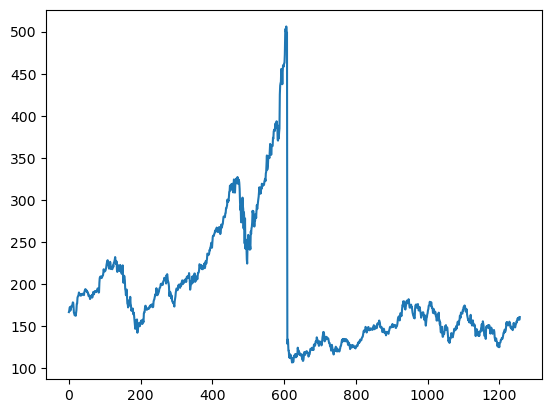

In [9]:
plt.plot(df1)

In [10]:
#LSTM ARE VERY SENSITY TO THE SCALE OF DATA 

import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler(feature_range = (0,1))# between 0 and 1
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [11]:
df1.shape


(1258, 1)

In [12]:
training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size
train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [13]:
len(train_data)

817

#timesteps = 3
means need back 3 days data neeeded for prediction of 4th day

eg  X_train        y_train
   f1   f2   f3    o/p 
   120  130  125    140

In [14]:
#timesteps = 3
#means need back 3 days data neeeded for prediction of 4th day

#eg  X_train        y_train
 #  f1   f2   f3    o/p 
#   120  130  125    140

#o same with test data set


In [33]:
import numpy as np

def create_dataset(dataset,time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

#reshape into t,t+1,t+2..... y=t+4
time_step = 100 
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)


In [16]:
X_train.shape

(716, 100)

In [17]:
y_train.shape

(716,)

In [19]:
# need to reshape in 3d for lstm
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test =X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [20]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow .keras.layers import LSTM


In [21]:
model = Sequential()
model.add(LSTM(50,return_sequences = True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer ="adam")

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(X_train,y_train,validation_data = (X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 7s 197ms/step - loss: 0.0445 - val_loss: 9.4436e-04
Epoch 2/100
12/12 [==============================] - 1s 123ms/step - loss: 0.0174 - val_loss: 0.0033
Epoch 3/100
12/12 [==============================] - 1s 118ms/step - loss: 0.0121 - val_loss: 0.0011
Epoch 4/100
12/12 [==============================] - 1s 117ms/step - loss: 0.0105 - val_loss: 0.0015
Epoch 5/100
12/12 [==============================] - 1s 121ms/step - loss: 0.0115 - val_loss: 0.0021
Epoch 6/100
12/12 [==============================] - 1s 118ms/step - loss: 0.0088 - val_loss: 4.2676e-04
Epoch 7/100
12/12 [==============================] - 1s 118ms/step - loss: 0.0088 - val_loss: 4.5552e-04
Epoch 8/100
12/12 [==============================] - 1s 118ms/step - loss: 0.0077 - val_loss: 4.8112e-04
Epoch 9/100
12/12 [==============================] - 1s 118ms/step - loss: 0.0094 - val_loss: 0.0035
Epoch 10/100
12/12 [==============================] - 1s 119ms/step - loss:

In [24]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

11/11 [==============================] - 0s 21ms/step


In [27]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [28]:
import math
from sklearn.metrics import mean_squared_error

In [29]:
math.sqrt(mean_squared_error(y_train,train_predict))

228.96324494129448

In [30]:
math.sqrt(mean_squared_error(y_test,test_predict))

157.17055563389414

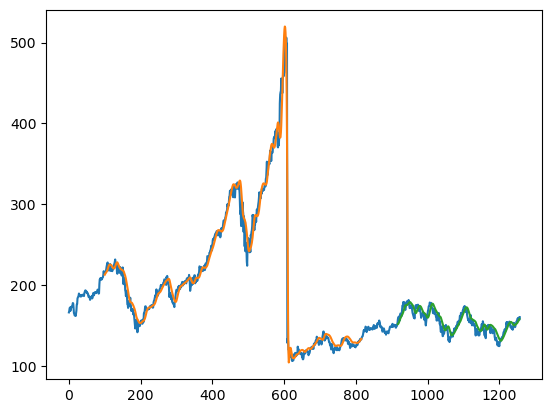

In [35]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [36]:
len(test_data)

441

In [49]:
# we need last 100 days data to predict nect 30days
x_input =test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [50]:
temp_input = list(x_input)
temp_input =temp_input[0].tolist()

In [58]:
temp_input

[0.07428929242329363,
 0.06930494677520344,
 0.06394489668127734,
 0.06376956793988725,
 0.07165936130244199,
 0.0635942391984971,
 0.06266750156543521,
 0.05808390732623664,
 0.04809016906700059,
 0.05703193487789604,
 0.05783343769567939,
 0.04566061365059482,
 0.04889167188478394,
 0.045535378835316165,
 0.05705698184095176,
 0.05838447088290544,
 0.05983719474013771,
 0.06675015654351907,
 0.0665497808390732,
 0.0699311208515967,
 0.0728866624921728,
 0.07105823418910456,
 0.07120851596743893,
 0.07772072636192856,
 0.08583594239198494,
 0.08939261114589853,
 0.08771446462116467,
 0.09297432686286783,
 0.09790857858484658,
 0.09056981840951783,
 0.0938008766437069,
 0.09665623043206006,
 0.11015654351909826,
 0.11937382592360674,
 0.1124358171571696,
 0.11974953036944269,
 0.11291170945522849,
 0.11028177833437691,
 0.1106324358171571,
 0.11774577332498432,
 0.11611772072636184,
 0.12145272385723233,
 0.11739511584220413,
 0.11448966812773947,
 0.10429555416405756,
 0.1053725735754

In [51]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.13238773]
101
1 day input [0.07899812 0.08035066 0.08180338 0.07020664 0.10026299 0.10735128
 0.10379461 0.10820288 0.10507201 0.10990607 0.11133375 0.10311835
 0.10855354 0.11078272 0.10336882 0.09362555 0.08598622 0.10316844
 0.10386976 0.10261741 0.09966187 0.0903444  0.08541014 0.08969317
 0.08846587 0.09430182 0.09675642 0.0910958  0.07428929 0.06930495
 0.0639449  0.06376957 0.07165936 0.06359424 0.0626675  0.05808391
 0.04809017 0.05703193 0.05783344 0.04566061 0.04889167 0.04553538
 0.05705698 0.05838447 0.05983719 0.06675016 0.06654978 0.06993112
 0.07288666 0.07105823 0.07120852 0.07772073 0.08583594 0.08939261
 0.08771446 0.09297433 0.09790858 0.09056982 0.09380088 0.09665623
 0.11015654 0.11937383 0.11243582 0.11974953 0.11291171 0.11028178
 0.11063244 0.11774577 0.11611772 0.12145272 0.11739512 0.11448967
 0.10429555 0.10537257 0.10659987 0.09986224 0.10289292 0.10161553
 0.09635567 0.09785848 0.11068253 0.11769568 0.11211021 0.11529117
 0.10958046 0.10434565 0.1092799 

11 day output [[0.14125885]]
12 day input [0.10311835 0.10855354 0.11078272 0.10336882 0.09362555 0.08598622
 0.10316844 0.10386976 0.10261741 0.09966187 0.0903444  0.08541014
 0.08969317 0.08846587 0.09430182 0.09675642 0.0910958  0.07428929
 0.06930495 0.0639449  0.06376957 0.07165936 0.06359424 0.0626675
 0.05808391 0.04809017 0.05703193 0.05783344 0.04566061 0.04889167
 0.04553538 0.05705698 0.05838447 0.05983719 0.06675016 0.06654978
 0.06993112 0.07288666 0.07105823 0.07120852 0.07772073 0.08583594
 0.08939261 0.08771446 0.09297433 0.09790858 0.09056982 0.09380088
 0.09665623 0.11015654 0.11937383 0.11243582 0.11974953 0.11291171
 0.11028178 0.11063244 0.11774577 0.11611772 0.12145272 0.11739512
 0.11448967 0.10429555 0.10537257 0.10659987 0.09986224 0.10289292
 0.10161553 0.09635567 0.09785848 0.11068253 0.11769568 0.11211021
 0.11529117 0.10958046 0.10434565 0.1092799  0.11458986 0.11559173
 0.12275517 0.12062617 0.12663745 0.13134627 0.12771446 0.13046963
 0.13377583 0.1288415

19 day output [[0.14711154]]
20 day input [0.10261741 0.09966187 0.0903444  0.08541014 0.08969317 0.08846587
 0.09430182 0.09675642 0.0910958  0.07428929 0.06930495 0.0639449
 0.06376957 0.07165936 0.06359424 0.0626675  0.05808391 0.04809017
 0.05703193 0.05783344 0.04566061 0.04889167 0.04553538 0.05705698
 0.05838447 0.05983719 0.06675016 0.06654978 0.06993112 0.07288666
 0.07105823 0.07120852 0.07772073 0.08583594 0.08939261 0.08771446
 0.09297433 0.09790858 0.09056982 0.09380088 0.09665623 0.11015654
 0.11937383 0.11243582 0.11974953 0.11291171 0.11028178 0.11063244
 0.11774577 0.11611772 0.12145272 0.11739512 0.11448967 0.10429555
 0.10537257 0.10659987 0.09986224 0.10289292 0.10161553 0.09635567
 0.09785848 0.11068253 0.11769568 0.11211021 0.11529117 0.10958046
 0.10434565 0.1092799  0.11458986 0.11559173 0.12275517 0.12062617
 0.12663745 0.13134627 0.12771446 0.13046963 0.13377583 0.12884158
 0.12726362 0.13507827 0.13238773 0.13359164 0.13462377 0.13552341
 0.13632976 0.1370755

29 day output [[0.15421483]]
[[0.13238772749900818], [0.1335916370153427], [0.13462376594543457], [0.13552340865135193], [0.1363297551870346], [0.13707558810710907], [0.13778598606586456], [0.13847896456718445], [0.13916663825511932], [0.13985665142536163], [0.14055339992046356], [0.1412588506937027], [0.1419733464717865], [0.14269614219665527], [0.14342573285102844], [0.14416036009788513], [0.14489808678627014], [0.14563699066638947], [0.14637534320354462], [0.14711153507232666], [0.14784447848796844], [0.148573100566864], [0.1492968052625656], [0.1500152051448822], [0.15072813630104065], [0.1514355093240738], [0.15213757753372192], [0.15283457934856415], [0.1535268872976303], [0.15421482920646667]]


In [52]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

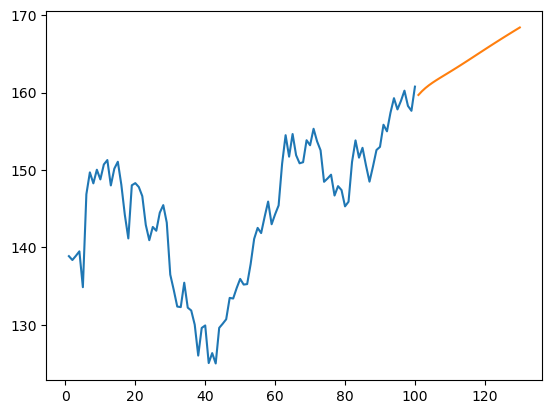

In [53]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

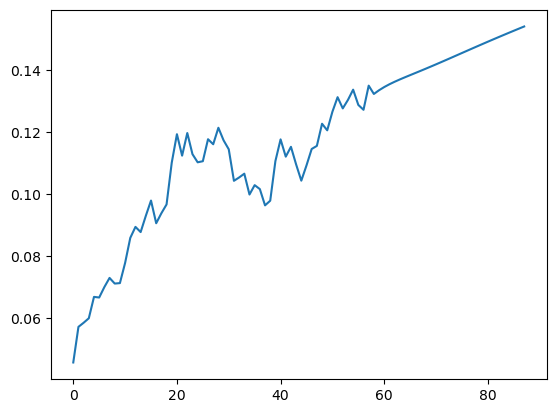

In [59]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

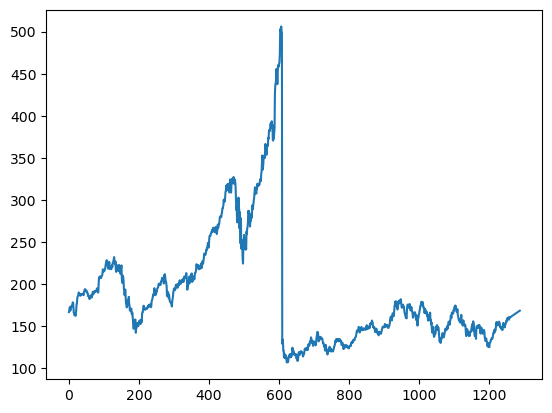

In [60]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)